In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/AIML/SNLP_BLOGS'  #change dir to  project folder

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
#this will prompt you to upload the kaggle.json
from google.colab import files
files.upload()  

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vh2019","key":"308780deb39ecd8dfb5448aa5c3638ed"}'}

In [11]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


1. Load the dataset (5 points) a. Tip: As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly.

In [0]:
root_path = '/content/gdrive/My Drive/AIML/SNLP_BLOGS1'

In [13]:
#download the dataset
!kaggle datasets download -d rtatman/blog-authorship-corpus -p '/content/gdrive/My Drive/AIML/SNLP_BLOGS1/'

blog-authorship-corpus.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
ls '/content/gdrive/My Drive/AIML/SNLP_BLOGS1/'

blog-authorship-corpus.zip  blogtext.csv


In [15]:
#Unzip File

import os
os.chdir('/content/gdrive/My Drive/AIML/SNLP_BLOGS1/')  #change dir
!unzip blog-authorship-corpus.zip

Archive:  blog-authorship-corpus.zip
replace blogtext.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: blogtext.csv            


In [16]:
 
with open("blogtext.csv") as myfile:
    head = [next(myfile) for x in range(5)]
print(head)


['id,gender,age,topic,sign,date,text\n', '2059027,male,15,Student,Leo,"14,May,2004","           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         "\n', '2059027,male,15,Student,Leo,"13,May,2004","           These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          "\n', '2059027,male,15,Student,Leo,"12,May,2004","           In het kader van kernfusie op aarde:  MAAK JE EIGEN WATERSTOFBOM   How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An H-Bomb (humorous!) Date: 7 Feb 1994 07:41:14 GMT Organization: The University of Western Australia  Original file dated 12th November 1990. Seemed to be a transcript of a \'Seven Days\' article. Poorly formatted and corrupted. I have added the text between \'examine under a micros

In [0]:
#Reading Blogs
import pandas as pd
import numpy as np
import scipy as sp
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [18]:
#read blogtext.csv
blog=pd.read_csv('blogtext.csv',dtype=str, sep=',')
print("Number of rows in data =",blog.shape[0])
print("Number of columns in data =",blog.shape[1])
print("\n")
print("**Sample data:**")
blog.head()

Number of rows in data = 681284
Number of columns in data = 7


**Sample data:**


,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [19]:
blog.dtypes

id        object
gender    object
age       object
topic     object
sign      object
date      object
text      object
dtype: object

In [20]:
blog.groupby(['sign']).size()

sign
Aquarius       49687
Aries          64979
Cancer         65048
Capricorn      49201
Gemini         51985
Leo            53811
Libra          62363
Pisces         54053
Sagittarius    50036
Scorpio        57161
Taurus         62561
Virgo          60399
dtype: int64

In [21]:
blog.groupby(['sign','gender']).size()

sign         gender
Aquarius     female    23000
             male      26687
Aries        female    30945
             male      34034
Cancer       female    33912
             male      31136
Capricorn    female    26221
             male      22980
Gemini       female    24267
             male      27718
Leo          female    25159
             male      28652
Libra        female    32551
             male      29812
Pisces       female    27859
             male      26194
Sagittarius  female    23748
             male      26288
Scorpio      female    28927
             male      28234
Taurus       female    28393
             male      34168
Virgo        female    31109
             male      29290
dtype: int64

In [22]:
blog.groupby(['gender']).size()

gender
female    336091
male      345193
dtype: int64

2. Preprocess rows of the “text” column (7.5 points) a. Remove unwanted characters b. Convert text to lowercase c. Remove unwanted spaces d. Remove stopwords

In [0]:
#selecting 5000 rows from dataset
blog5k=blog.loc[0:4999,:]

In [24]:
blog5k.shape

(5000, 7)

In [0]:
#a. Remove unwanted characters 

In [26]:
blog5k.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [0]:
blog5k['text'].replace(regex=True, inplace=True, to_replace=r'[^A-Za-z\s]+^0-9.\-]', value=r'')
blog5k['text'] = blog5k['text'].astype(object)

In [28]:
blog5k.text[15]

"             One thing I love about Seoul (and I mean this about Korea in general...I just happen to be a little Seoul-centric) is the street sellers.  I don't really trust the food they sell on the side of the road (except ice cream) but virtually everything else is fair game for me.  For example, to get ready for my trip to Canada and generally stock up, in the last two weeks I bought:  2 plants in a can for my nieces (8,000 won) 2 lightweight sports shirts for inlining (10,000 won for both) 1 pair of shorts for inlining (20,000 won) 3 bags of dried 고구마 (goguma, sweet potatoes or yams, they were selling 1 for 3,000 won , 2 for 5,000 but I got 3 for 6,000) 1 tie (at an amazing price of 5,000 won, or USD 4...and I can't really tell how it's worse than the ones I bought for USD 100 back home.) 10 disposible razors (for 1,000 won, or USD 0.80 FOR ALL TEN) 1 noise-making toy hammer for boy #2 (1,000 won) 3 Disney photo albums (but I'm sure ol' Walt didn't make a penny on these....just 1,

In [29]:
blog5k.fillna('0')

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
4995,1103575,female,17,indUnk,Scorpio,"27,August,2003",So... I had another one of those dreams...
4996,1103575,female,17,indUnk,Scorpio,"27,August,2003",mmm... strawberry tea for breakfast. To...
4997,1103575,female,17,indUnk,Scorpio,"27,August,2003","Yay for a new layout!! Yeah, I know, I..."
4998,1103575,female,17,indUnk,Scorpio,"26,August,2003","Ok, so I lied... Fed up isn't playing F..."


In [30]:
blog5k['text'].str.replace("-",' ')
blog5k['text'].str.replace("!!",' ')
blog5k['text'].str.replace("...",' ')

0                                                     ...
1                                                     ...
2                                                     ...
3                                                        
4                                                     ...
                              ...                        
4995                                                  ...
4996                                                  ...
4997                                                  ...
4998                                                  ...
4999                                                  ...
Name: text, Length: 5000, dtype: object

In [0]:
#replace foreign characters
import re
def replace_foreign_characters(s):
    return re.sub(r'[^\x00-\x7f]',r'', s)

blog5k['text'] = blog5k['text'].apply(lambda x: replace_foreign_characters(x))

In [0]:
#Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem(text):
    tokenized_text = tokenize(text)
    stems = [stemmer.stem(token) for token in tokenized_text]
    return ' '.join(stems)

In [0]:
#b. Convert text to lowercase 
blog5k['text'] = blog5k['text'].str.lower()

In [0]:
blog5k.text = blog5k.text.str.strip()

In [35]:
blog5k.text[15]

"one thing i love about seoul (and i mean this about korea in general...i just happen to be a little seoul-centric) is the street sellers.  i don't really trust the food they sell on the side of the road (except ice cream) but virtually everything else is fair game for me.  for example, to get ready for my trip to canada and generally stock up, in the last two weeks i bought:  2 plants in a can for my nieces (8,000 won) 2 lightweight sports shirts for inlining (10,000 won for both) 1 pair of shorts for inlining (20,000 won) 3 bags of dried  (goguma, sweet potatoes or yams, they were selling 1 for 3,000 won , 2 for 5,000 but i got 3 for 6,000) 1 tie (at an amazing price of 5,000 won, or usd 4...and i can't really tell how it's worse than the ones i bought for usd 100 back home.) 10 disposible razors (for 1,000 won, or usd 0.80 for all ten) 1 noise-making toy hammer for boy #2 (1,000 won) 3 disney photo albums (but i'm sure ol' walt didn't make a penny on these....just 1,000 won each)  t

In [36]:
#d. Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
STOPWORDS = set(stopwords.words('english'))

In [0]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

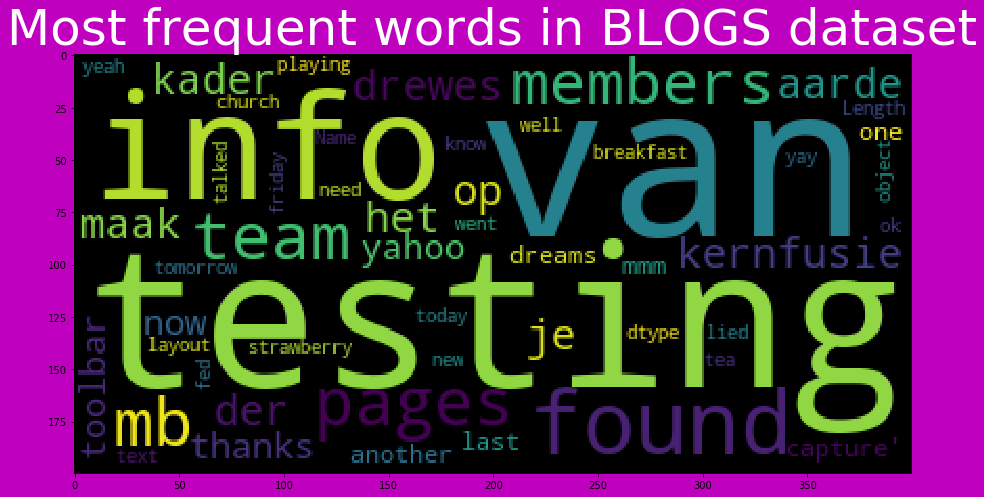

In [39]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud()
# generate word cloud using text column
wc.generate(str(blog5k['text']))
# declare our figure 
plt.figure(figsize=(15,8), facecolor='m')
# add title to the graph
plt.title("Most frequent words in BLOGS dataset", fontsize=50,color='white')
plt.imshow(wc)
plt.show()

3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points)

a. Label columns to merge: “gender”, “age”, “topic”, “sign”

b. After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels”

In [40]:
print (list(blog5k))

['id', 'gender', 'age', 'topic', 'sign', 'date', 'text']


In [0]:
# a. Label columns to merge: “gender”, “age”, “topic”, “sign”
Label=blog5k['gender']+[',' ] + blog5k['age'].astype(str) +[',' ] + blog5k['topic']+[',' ] + blog5k['sign']

In [0]:
blog5k.insert(7,'Label',Label)

In [43]:
blog5k.head(3)

,id,gender,age,topic,sign,date,text,Label
0,2059027,male,15,Student,Leo,"14,May,2004","info has been found (+/- 100 pages, and 4.5 mb...","male,15,Student,Leo"
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members: drewes van der l...,"male,15,Student,Leo"
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde: maak je ...,"male,15,Student,Leo"


In [0]:
# b.	After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels” as shown in the below image

In [0]:
del blog5k['gender']
del blog5k['age']
del blog5k['topic']
del blog5k['sign']
del blog5k['date']


In [46]:
blog5k.head(3)

,id,text,Label
0,2059027,"info has been found (+/- 100 pages, and 4.5 mb...","male,15,Student,Leo"
1,2059027,these are the team members: drewes van der l...,"male,15,Student,Leo"
2,2059027,in het kader van kernfusie op aarde: maak je ...,"male,15,Student,Leo"



***4.	Separate features and labels, and split the data into training and testing (5 points)***

In [0]:
X=blog5k.text
y=blog5k.Label

In [0]:
from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest  = train_test_split(X,y, random_state=42, test_size=0.30, shuffle=True)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [49]:
xtrain.shape

(3750,)

In [50]:
xtest.shape

(1250,)

5. Vectorize the features (5 points)

a. Create a Bag of Words using count vectorizer

i. Use ngram_range=(1, 2)

ii. Vectorize training and testing features

b. Print the term-document matrix

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), norm='l2')
vectorizer.fit(xtrain)
vectorizer.fit(xtest)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [52]:
xtrain.head(3)

4825    i went to talk to the new owner of the repair ...
3067    it's 4 oclock in the morning damnit listen to ...
4869    today it was announced that not only will i ha...
Name: text, dtype: object

In [53]:
ytrain

4825                   male,26,indUnk,Gemini
3067                male,35,Technology,Aries
4869    male,25,BusinessServices,Sagittarius
2676                male,35,Technology,Aries
3296                male,35,Technology,Aries
                        ...                 
3448                male,35,Technology,Aries
341                 female,24,indUnk,Scorpio
4805                   male,26,indUnk,Gemini
234                 male,15,Student,Aquarius
657                male,24,Engineering,Libra
Name: Label, Length: 3750, dtype: object

In [0]:
xtrain = vectorizer.transform(X)
#ytrain = ytrain.drop(labels = ['id'], axis=1)
xtest = vectorizer.transform(y)
#ytest = ytest.drop(labels = ['id'], axis=1)

In [55]:
xtrain.shape

(5000, 123968)

In [56]:
xtest.shape

(5000, 123968)

In [57]:
ytest.shape

(1250,)

***6.	Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. (5 points) ***

In [58]:
Label_names = vectorizer.get_feature_names()
Label_counts = {s: Label_names.index(s) for s in Label_names}
Label_counts

{'00': 0,
 '00 actually': 1,
 '00 in': 2,
 '00 more': 3,
 '00 newton': 4,
 '00 not': 5,
 '00 pm': 6,
 '00 sumber': 7,
 '00 this': 8,
 '00 today': 9,
 '00 while': 10,
 '000': 11,
 '000 animals': 12,
 '000 anything': 13,
 '000 companion': 14,
 '000 credits': 15,
 '000 dollars': 16,
 '000 employees': 17,
 '000 in': 18,
 '000 japanese': 19,
 '000 layers': 20,
 '000 microsoft': 21,
 '000 more': 22,
 '000 most': 23,
 '000 nutjobs': 24,
 '000 of': 25,
 '000 pages': 26,
 '000 people': 27,
 '000 pound': 28,
 '000 square': 29,
 '000 to': 30,
 '000 was': 31,
 '000 won': 32,
 '000 xp': 33,
 '000 years': 34,
 '0000': 35,
 '0000 blinking': 36,
 '000miles': 37,
 '000miles away': 38,
 '000th': 39,
 '000th time': 40,
 '00pm': 41,
 '00pm the': 42,
 '01': 43,
 '01 22': 44,
 '01 bette': 45,
 '01 have': 46,
 '01 who': 47,
 '0128': 48,
 '0128 for': 49,
 '014': 50,
 '014 949': 51,
 '02': 52,
 '02 and': 53,
 '02 britney': 54,
 '02 do': 55,
 '02 faced': 56,
 '02 lott': 57,
 '02 republicans': 58,
 '02 what': 59

7. Transform the labels - (7.5 points) As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn a. Convert your train and test labels using MultiLabelBinarizer

In [59]:
blog5k.head(3)

,id,text,Label
0,2059027,"info has been found (+/- 100 pages, and 4.5 mb...","male,15,Student,Leo"
1,2059027,these are the team members: drewes van der l...,"male,15,Student,Leo"
2,2059027,in het kader van kernfusie op aarde: maak je ...,"male,15,Student,Leo"


In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

In [0]:
mlb = MultiLabelBinarizer(classes=sorted(Label_counts.keys()))
ytrain = mlb.fit_transform(ytrain)
ytest = mlb.fit_transform(ytest)

In [62]:
ytest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

8. Choose a classifier - (5 points)

In this task, we suggest using the One-vs-Rest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. 

As a basic classifier, use LogisticRegression. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.

  a.	Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on every label
  b.	As One-vs-Rest approach might not have been discussed in the sessions, we are providing you the code for that

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [0]:
def train_classifier(xtrain, ytrain):
      
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.
    
    lr = LogisticRegression(C=4.0,penalty='l2') # use L2 to optimise
    ovr = OneVsRestClassifier(lr)
    ovr.fit(xtrain, ytrain)
    return ovr

In [0]:
#Let’s run the classifier function against our training set
classifier_tfidf = train_classifier(xtrain, ytrain)

In [0]:
#Let’s use the model to predict first the output of using our training set. also get the score to be used for evaluation

In [0]:
#Let’s print a sample of 50 comments of our training set and compare what the model predicted vs the true labels

In [0]:
ytrain_predicted_labels = classifier_tfidf.predict(xtrain)
ytrain_predicted_scores = classifier_tfidf.decision_function(xtrain)

In [68]:
ytrain_pred_inversed = mlb.inverse_transform(ytrain_predicted_labels)
ytrain_inversed = mlb.inverse_transform(ytrain)
for i,text in enumerate(xtrain[15:20]):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        text,
        ','.join(ytrain_inversed[15:20][i]),
        ','.join(ytrain_pred_inversed[15:20][i])
    ))

Title:	  (0, 122642)	0.0435510789434668
  (0, 122525)	0.03594120180989939
  (0, 122522)	0.043845465143901655
  (0, 121885)	0.03198274940169885
  (0, 121604)	0.04093323091819327
  (0, 121589)	0.03284488250638238
  (0, 121400)	0.03993797128990311
  (0, 121386)	0.02639797333019803
  (0, 120992)	0.048026319701714004
  (0, 120974)	0.09605263940342801
  (0, 120935)	0.22320544776895643
  (0, 120196)	0.03993797128990311
  (0, 120170)	0.012574174259767004
  (0, 118450)	0.016167344457501676
  (0, 117823)	0.018358352754577794
  (0, 117561)	0.01714327929540326
  (0, 117419)	0.028217719264678105
  (0, 117261)	0.02359404880512485
  (0, 117020)	0.042110373212002006
  (0, 116818)	0.015299407839934175
  (0, 114699)	0.042110373212002006
  (0, 113652)	0.18163388670576192
  (0, 113517)	0.048026319701714004
  (0, 113508)	0.02112463048115737
  (0, 113351)	0.03501728442848127
  :	:
  (0, 6197)	0.02836964174813517
  (0, 6112)	0.04540847167644048
  (0, 5667)	0.03501728442848127
  (0, 5427)	0.08166830106582844


In [0]:
#Lets use now the test data to predict
ytest_predicted_labels = classifier_tfidf.predict(xtest)
ytest_predicted_scores = classifier_tfidf.decision_function(xtest)

In [0]:
################
#### THE BELOW STEP ONWARDS GOOGLE COLAB is crashing, tried multiple options. pls advice what I should have done differently
##################

In [2]:
ytest_pred_inversed = mlb.inverse_transform(ytest_predicted_labels)
ytest_inversed = mlb.inverse_transform(ytest)
for i,text in enumerate(xtest[10:14]):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        text,
        ','.join(y_val_inversed[10:14][i]),
        ','.join(y_val_pred_inversed[10:14][i])
    ))

NameError: ignored

9. Fit the classifier, make predictions and get the accuracy (5 points) a. Print the following i. Accuracy score ii. F1 score iii. Average precision score iv. Average recall score v. Tip: Make sure you are familiar with all of them. How would you expect the things to work for the multi-label scenario? Read about micro/macro/weighted averaging

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [0]:
def print_evaluation_scores(ytest, predicted):
    
  print('Accuracy:',accuracy_score(ytest, predicted))
  print('F1 Score:',f1_score(ytest, predicted, average='weighted'))
  print('Precision:',average_precision_score(ytest, predicted,average='weighted'))
  print('Recall:',recall_score(ytest, predicted,average='weighted'))

In [71]:
print_evaluation_scores(ytest, ytest_predicted_labels)

NameError: ignored

10.	 Print true label and predicted label for any five examples (7.5 points)

In [0]:
same as results of
=====================
ytest_pred_inversed = mlb.inverse_transform(ytest_predicted_labels)
ytest_inversed = mlb.inverse_transform(ytest)
for i,text in enumerate(xtest[10:14]):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        text,
        ','.join(y_val_inversed[10:14][i]),
        ','.join(y_val_pred_inversed[10:14][i])
    ))